# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Reading and Visualising Data 

In [2]:
df = pd.read_csv('Credit_Card_Dataset.csv')

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# Checking how many fraudile transactions there are in the dataset
(df["isFraud"] == 1).sum(), (df["isFraud"] == 0).sum(), (df["isFlaggedFraud"] == 1).sum()

(8213, 6354407, 16)

C:\Users\amans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

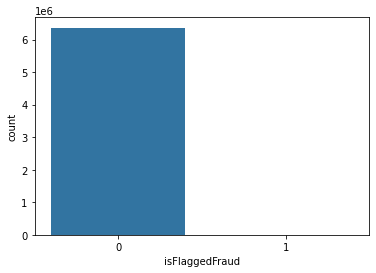

In [8]:
df.isFlaggedFraud.value_counts()
sns.countplot(df.isFlaggedFraud)

C:\Users\amans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

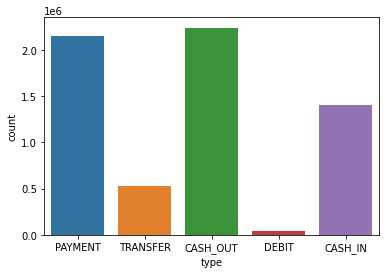

In [9]:
df.type.value_counts()
sns.countplot(df.type)

# Data Cleaning

### Ploting the transaction amounts

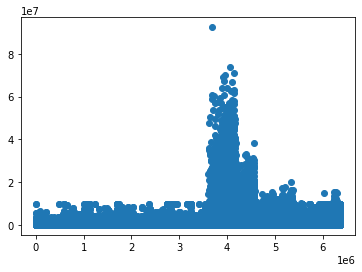

In [10]:
fig, ax = plt.subplots()
ax.scatter(df.index, df.amount);

### Droping columns on the basis of correlation

In [11]:
# Explore correlations to label
df.corr().isFlaggedFraud.sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
Name: isFlaggedFraud, dtype: float64

<AxesSubplot:>

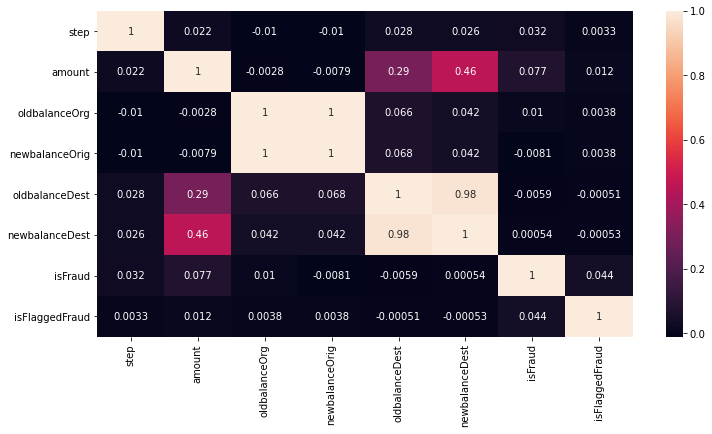

In [12]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
cor_matrix = df.corr().abs()
sns.heatmap(df.corr(), annot=True)

In [13]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
step             NaN  0.022373       0.010058        0.010299        0.027665   
amount           NaN       NaN       0.002762        0.007861        0.294137   
oldbalanceOrg    NaN       NaN            NaN        0.998803        0.066243   
newbalanceOrig   NaN       NaN            NaN             NaN        0.067812   
oldbalanceDest   NaN       NaN            NaN             NaN             NaN   
newbalanceDest   NaN       NaN            NaN             NaN             NaN   
isFraud          NaN       NaN            NaN             NaN             NaN   
isFlaggedFraud   NaN       NaN            NaN             NaN             NaN   

                newbalanceDest   isFraud  isFlaggedFraud  
step                  0.025888  0.031578        0.003277  
amount                0.459304  0.076688        0.012295  
oldbalanceOrg         0.042029  0.010154        0.003835  
newbalanceOrig        0.041837  0.

<ipython-input-13-56dc5b2d0b9d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [14]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['newbalanceOrig', 'newbalanceDest']


In [15]:
df = df.drop(to_drop, axis=1)
print(); print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg     nameDest  \
0     1   PAYMENT   9839.64  C1231006815       170136.0  M1979787155   
1     1   PAYMENT   1864.28  C1666544295        21249.0  M2044282225   
2     1  TRANSFER    181.00  C1305486145          181.0   C553264065   
3     1  CASH_OUT    181.00   C840083671          181.0    C38997010   
4     1   PAYMENT  11668.14  C2048537720        41554.0  M1230701703   

   oldbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3         21182.0        1               0  
4             0.0        0               0  


In [16]:
df.shape

(6362620, 9)

### Cleaning Outliers using zscore

<AxesSubplot:xlabel='amount'>

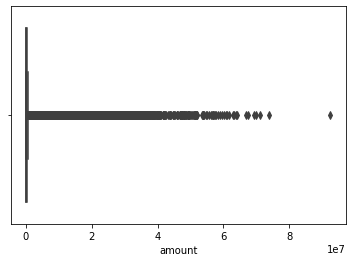

In [17]:
# Boxplot to check outlier value
sns.boxplot(data=df,x=df['amount'])

In [18]:
z = np.abs(stats.zscore(df))
print(z)

In [19]:
threshold = 3
print(np.where(z > 3))

In [20]:
df = df[(z < 3).all(axis=1)]
df.shape

# Data Processing

In [21]:
# converting non numerical data to numberical data
le = LabelEncoder()
df.type = le.fit_transform(df.type)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,4,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,1,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,3,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


### Spliting Imbalanced using stratify parameter  

In [23]:
# Split data into 80% train and 20% test
X = df.drop(columns=['isFlaggedFraud', 'nameDest', 'nameOrig'], axis=1)
y = df['isFraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [24]:
X_train.shape, X_val.shape

((5090096, 6), (1272524, 6))

# Modelling

### Random Forest

In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Apply model to validation data
y_predict = model.predict(X_val)

In [ ]:

actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

In [ ]:
model_score = model.score(X_val, y_val)

In [ ]:
confusion_matrix(y_val, y_predict)

In [ ]:
print(model_score)

In [ ]:
print(classification_report(y_val, y_predict))